In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetis.csv')
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [3]:
X = df[['glucose','bloodpressure']]
y = df['diabetes']

In [4]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Create a Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

# Train the classifier on the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
# Make predictions on the test data
y_pred = dtc.predict(X_test)
print("Decision Tree classifier Prediction: ",y_pred)

Decision Tree classifier Prediction:  [1 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0
 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0
 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1
 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 1 0]


In [16]:
# Classification Report
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score, roc_curve, auc
class_report = classification_report(y_test, y_pred)
print("Decision Tree Classification Report:\n", class_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       140
           1       0.95      0.93      0.94       159

    accuracy                           0.94       299
   macro avg       0.94      0.94      0.94       299
weighted avg       0.94      0.94      0.94       299



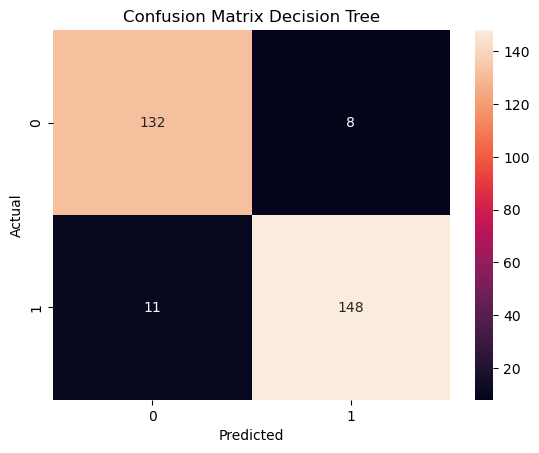

In [12]:
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree')
plt.show()

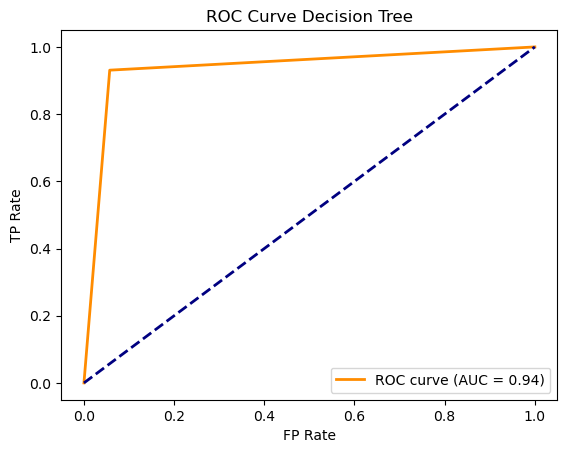

In [17]:
from sklearn.metrics import  roc_auc_score, roc_curve, auc, classification_report
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate the AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_pred)
# Create the ROC curve plot
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title(f'ROC Curve Decision Tree')
plt.legend(loc='lower right')
plt.show()